Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [3]:
# UPLOAD DATA 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df= pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# FOR CHECK NULL VALUES OR NOT IN DATA 
    
df.info()                 # no null value in data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# DROP THE STATE COLUMN FROM DATA 

df2=df.drop(['State'], axis=1)    
df2.head(3)                      # here I have droped state column because that is not have meaning to trend model 

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


In [31]:
# RENAME THE COLUMNS NAME 

df2.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'}, inplace=True)
df2.head()                                                                             # here I have renamed the columns name 

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
# CORRELATION BETWEEN COLUMNS VALUES 

df2.corr()  # by this correlation we can understand that administration column is not giving good profit

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


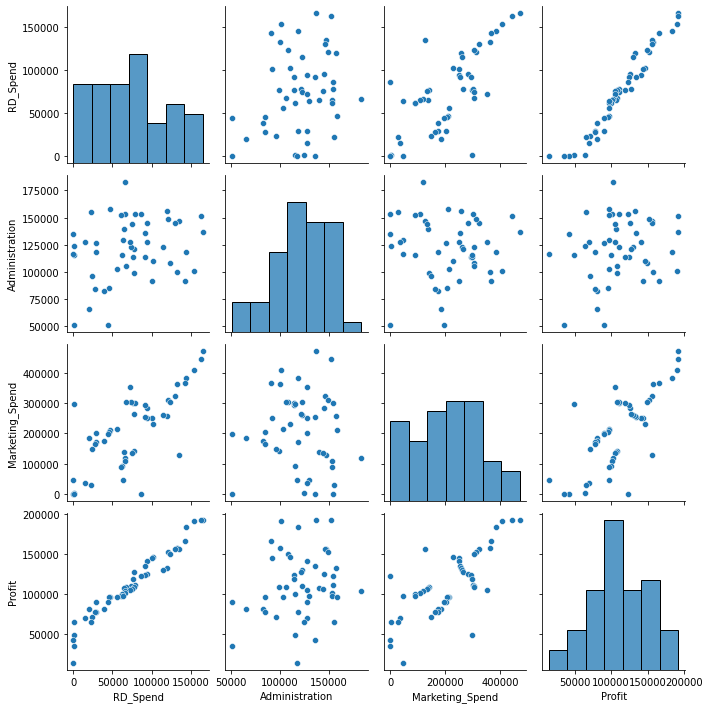

In [8]:
#  DATA VISUALIZATION    =

import seaborn as sns
sns.pairplot(df2)

<AxesSubplot:>

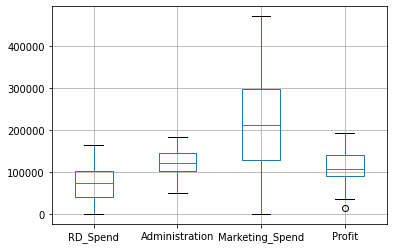

In [9]:
df2.boxplot()                # ITS MEAN INDEPENDENT VARIABLE DON'T HAVE OUTLIER  

<AxesSubplot:>

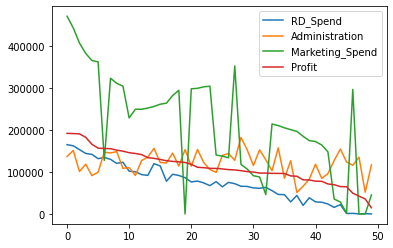

In [32]:
df2.plot()

In [10]:
# MODEL TRAIN BETWEEN PROFIT AND RD_Spend

import statsmodels.formula.api as smf
model1=smf.ols('Profit~ RD_Spend', data =df2).fit()    # here I have used least square method model and used single columns for model

In [11]:
model1.rsquared

0.9465353160804392

In [12]:
# MODEL TRAIN BETWEEN PROFIT AND Administration

model2=smf.ols('Profit~  Administration', data =df2).fit()

In [13]:
model2.rsquared

0.04028714077757223

In [14]:
# MODEL TRAIN BETWEEN PROFIT AND Marketing_Spend

model3=smf.ols('Profit~ Marketing_Spend', data =df2).fit()

In [15]:
model3.rsquared

0.5591535746115515

In [16]:
model4=smf.ols('Profit~ RD_Spend+Marketing_Spend+Administration', data =df2).fit()


In [17]:
model4.rsquared

0.9507459940683246

In [18]:
model5=smf.ols('Profit~ RD_Spend+Marketing_Spend', data =df2).fit()


In [19]:
model5.rsquared

0.9504503015559763

In [20]:
# R_SQUARED VALUES FOR DIFFRENT MODEL WITH DIFFERENT COLUMNS

table= pd.DataFrame({'model':['model1','model2','model3','model4','model5'],'rsquared_value':[0.9465,0.04028,0.55910,.9507,
0.95045 ],'Features':['RD_Spend','Administration','Marketing_Spend','RD_Spend+Marketing_Spend+Administration',
                      'RD_Spend+Marketing_Spend',]})

table

,model,rsquared_value,Features
0,model1,0.94650,RD_Spend
1,model2,0.04028,Administration
2,model3,0.55910,Marketing_Spend
3,model4,0.95070,RD_Spend+Marketing_Spend+Administration
4,model5,0.95045,RD_Spend+Marketing_Spend


* By above table we can understand that how much important individual features
* We have understood that Administration features is not important for predict profit 

# Second Question

* Consider only the below columns and prepare a prediction model for predicting Price.

* Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

* Model -- model of the car
* Price  -- Offer Price in EUROs	
* Age_08_04 -- Age in months as in August 2004	
* Mfg_Month -- Manufacturing month (1-12)	
* Mfg_Year	-- Manufacturing Year
* KM -- Accumulated Kilometers on odometer
* Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
* HP -- Horse Power
* Met_Color	 -- Metallic Color?  (Yes=1, No=0)
* Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
* Automatic	-- Automatic ( (Yes=1, No=0)
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Cylinders	-- Number of cylinders
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms
* Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
* BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
* Guarantee_Period -- 	Guarantee period in months
* ABS -- Anti-Lock Brake System (Yes=1, No=0)
* Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
* Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
* Airco -- Airconditioning  (Yes=1, No=0)
* Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
* Boardcomputer -- Boardcomputer  (Yes=1, No=0)
* CD_Player -- CD Player  (Yes=1, No=0)
* Central_Lock -- Central Lock  (Yes=1, No=0)
* Powered_Windows -- Powered Windows  (Yes=1, No=0)
* Power_Steering -- Power Steering  (Yes=1, No=0)
* Radio -- Radio  (Yes=1, No=0)
* Mistlamps	-- Mistlamps  (Yes=1, No=0)
* Sport_Model -- Sport Model  (Yes=1, No=0)
* Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
* Metallic_Rim --Metallic Rim  (Yes=1, No=0)
* Radio_cassette -- Radio Cassette  (Yes=1, No=0)
* Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [57]:
# UPLOAD DATA FOR SECOND QUESTION 

import pandas as pd
df3=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
df3.head()                      

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [58]:
#  DATA INFORMATION 
df3.info()   # no null values in this data also 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [59]:
df3.shape     # 38 COLUMNS AND 1436 ARE ROWS 

(1436, 38)

In [60]:
# I HAVE DROPS 29 COLUMNS BECAUSE WE NEED ONLY 9 COLUMNS ACCORDING THE QUESTION 

df4=df3.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
        'BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player',
        'Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider',
    'Metallic_Rim', 'Radio_cassette','Tow_Bar'], axis=1)   # here i have droped some columns and have taken according question

In [61]:
df4                                                                            #  we have to work only these columns 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [63]:
# DATA CONVERTED INTO IN THE ARRAY 
array = df4.values                                 

In [64]:
# STANDARDIZATION 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(array)                          
df5=scaler.transform(array)
df5

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [65]:
# SET THE COLUMNS NAME AFTER STATDARDIZATION 

df6=pd.DataFrame({'Price':df5[0: , 0],'Age_08_04':df5[0:,1], 'KM':df5[0:,2], 'HP':df5[0:,3],'cc':df5[0:,4],'Doors':df5[0:,5],
                  'Gears':df5[0:,6],'Quarterly_Tax':df5[0:,7], 'Weight':df5[0:,8]})
df6

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


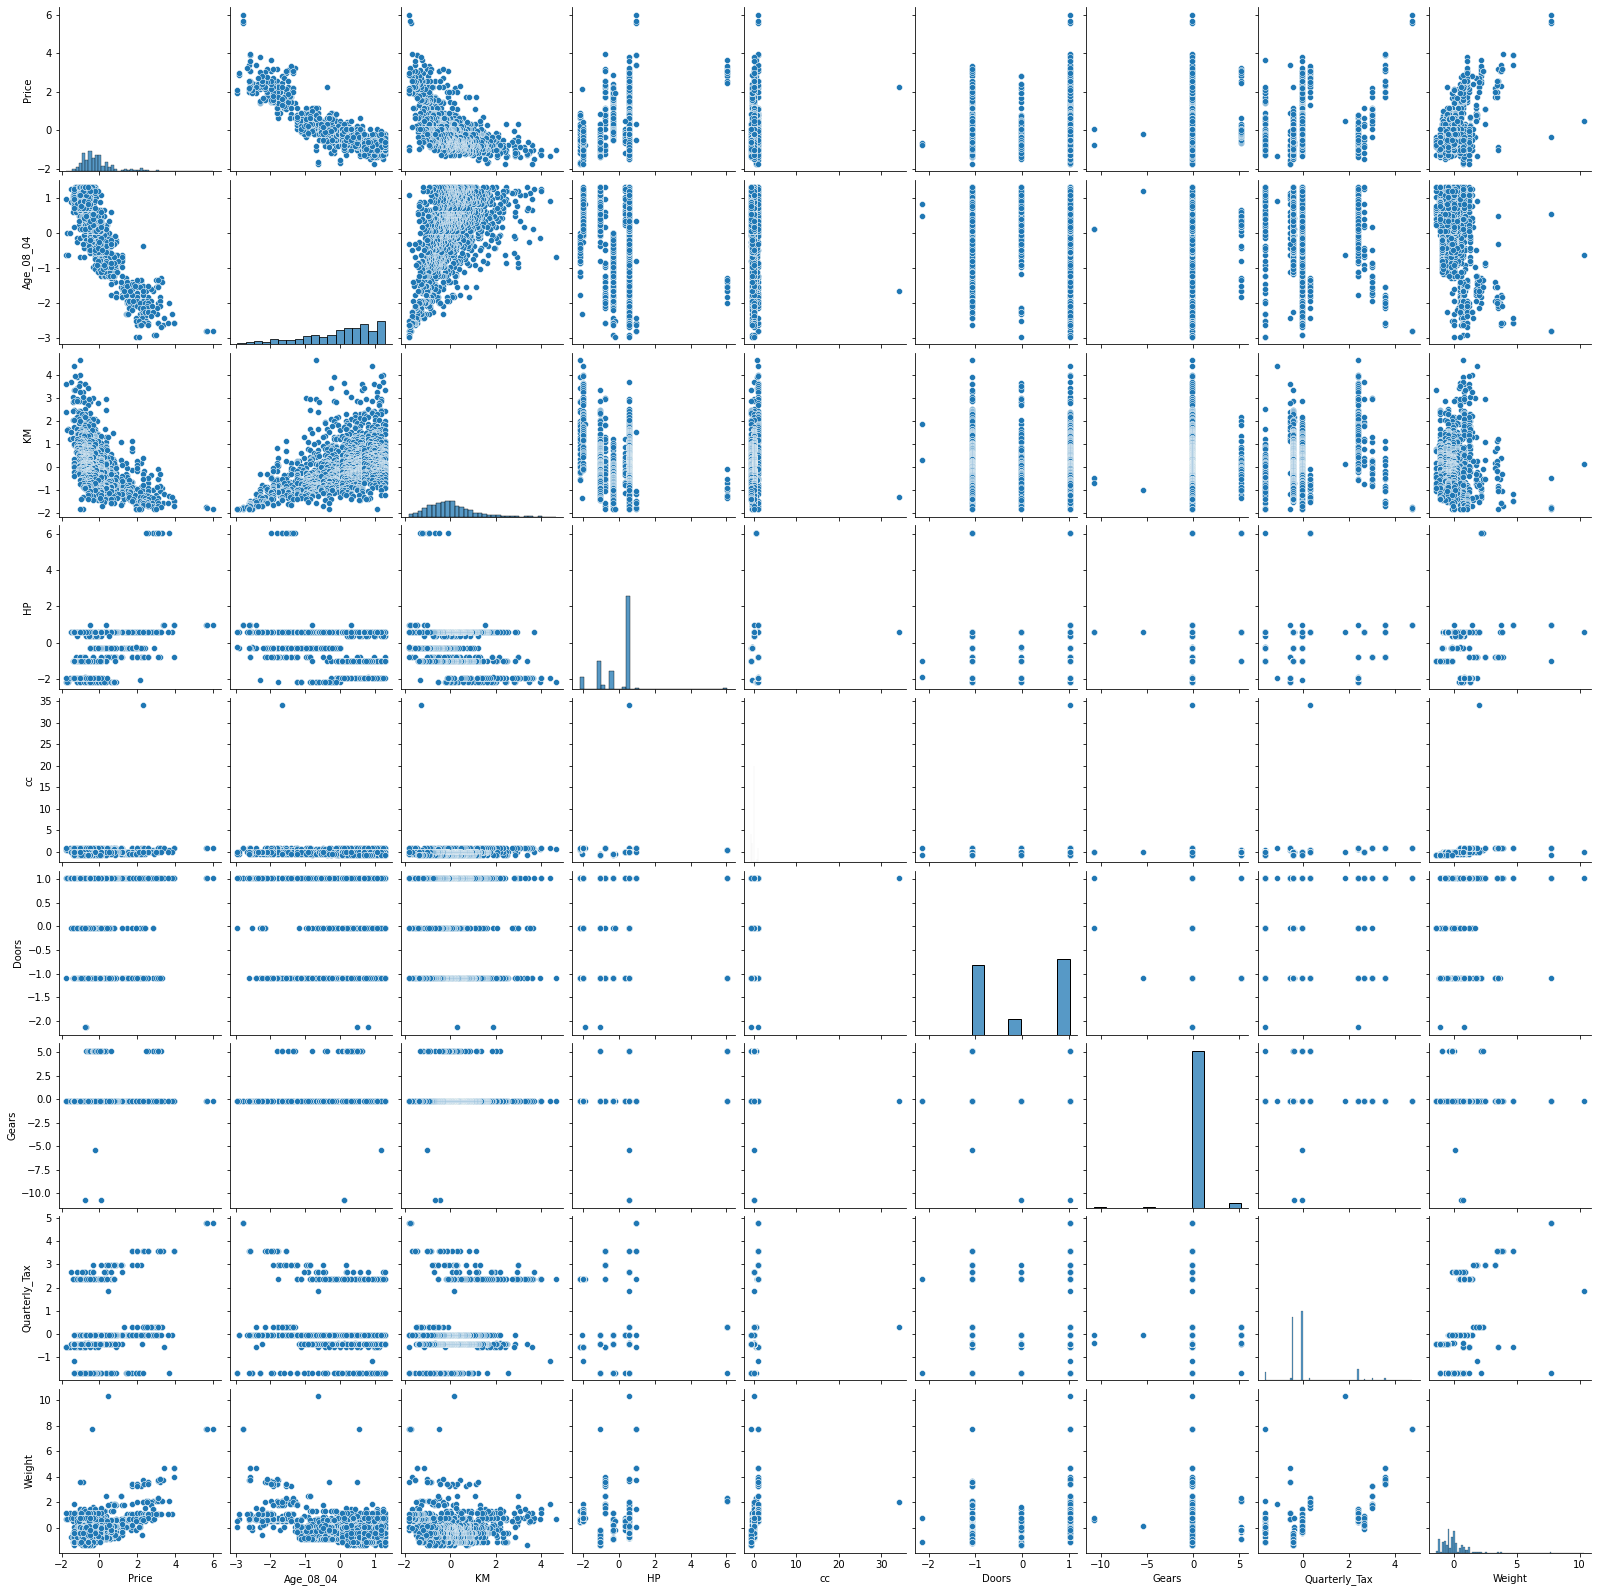

In [82]:
# DATA VISUALIZATION 
import seaborn as sns
sns.pairplot(df6)

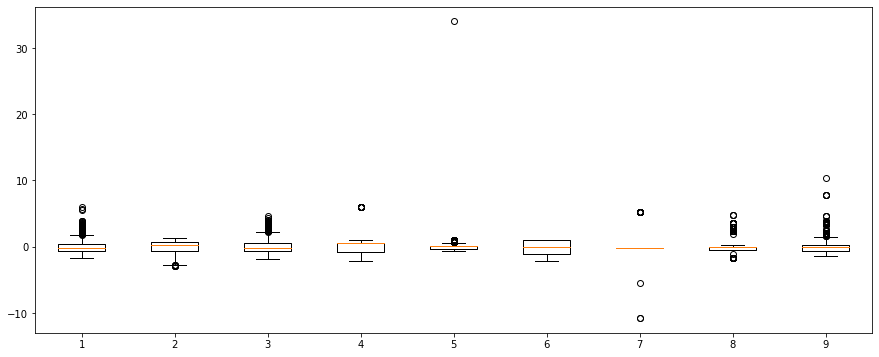

In [83]:
# Boxplot
plt.figure(figsize=(15,6)) # this give size of box

plt.boxplot(df6)                              # by this boxplot we can understand about outlir in the data 
plt.show()                                    # if we romve these outlier then we can get goot prediction 

<AxesSubplot:>

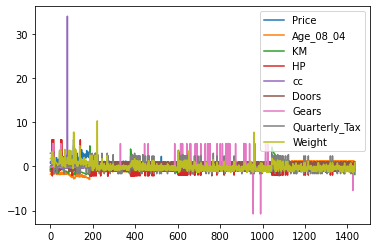

In [86]:
df6.plot()       # this plot don't any meaning for this data 

In [84]:
# CORRELATION BETWEEN COLUMNS VALUES 

df6.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


* above corellation we can which one is less or more important for prediction of price 
* Gears column has less impotance for we can remove this

In [33]:
# MODEL WITH ALL COLUMNS VALUES 

import statsmodels.formula.api as smf
model11= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df4).fit()

In [34]:
model11.rsquared

0.8637627463428192

In [35]:
#MODEL WITH AGE OF CAR COLUMNS ONLY 
import statsmodels.formula.api as smf
model12= smf.ols('Price~Age_08_04', data=df4).fit()


In [36]:
model12.rsquared          # ITS MEAN CAR AGE IS VERY IMPORTANT FOR CAR PRICE PREDICTION 

0.7684108996825326

In [37]:
# MODEL WITH GEARS COLUMN 
import statsmodels.formula.api as smf
model13= smf.ols('Price~Gears', data=df4).fit()

In [38]:
model13.rsquared                     #  ITS MEAN GEARS COLUMNS IS VERY LESS IMPORTANT FOR PRICE PREDICTION OF CAR 

0.003982096785360323

In [39]:
# MODEL WITHOUT GEARS COLUMNS 

import statsmodels.formula.api as smf
model14= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data=df4).fit() 

In [40]:
model14.rsquared

0.8628943128267853